# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Importing the pictureset

In [2]:
# downloading the weather images and putting them in a directory
path = r"C:\Users\Sam\Desktop\CF\Machine Learning\Part 2\2.5 Visual Applications of ML\archive\Multi-class Weather Dataset"
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
# loading the picture set and rescaling them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
# a CNN to categorize the pictures
inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [6]:
# compiling and running a model with 10 epochs
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 10, 
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/10
28/28 [==============================] - 38s 1s/step - loss: 0.0926 - accuracy: 0.7537 - val_loss: 0.0874 - val_accuracy: 0.7812
Epoch 2/10
28/28 [==============================] - 39s 1s/step - loss: 0.0651 - accuracy: 0.8292 - val_loss: 0.0653 - val_accuracy: 0.8170
Epoch 3/10
28/28 [==============================] - 39s 1s/step - loss: 0.0709 - accuracy: 0.8147 - val_loss: 0.0716 - val_accuracy: 0.8080
Epoch 4/10
28/28 [==============================] - 45s 2s/step - loss: 0.0684 - accuracy: 0.8136 - val_loss: 0.0859 - val_accuracy: 0.7723
Epoch 5/10
28/28 [==============================] - 42s 1s/step - loss: 0.0518 - accuracy: 0.8650 - val_loss: 0.0974 - val_accuracy: 0.7679
Epoch 6/10
28/28 [==============================] - 42s 1s/step - loss: 0.0692 - accuracy: 0.8228 - val_loss: 0.0561 - val_accuracy: 0.8616
Epoch 7/10
28/28 [==============================] - 42s 2s/step - loss: 0.0531 - accuracy: 0.8654 - val_loss: 0.0622 - val_accuracy: 0.8304
Epoch 8/10
28/28 [==

In [7]:
results = pd.DataFrame(model.history.history)

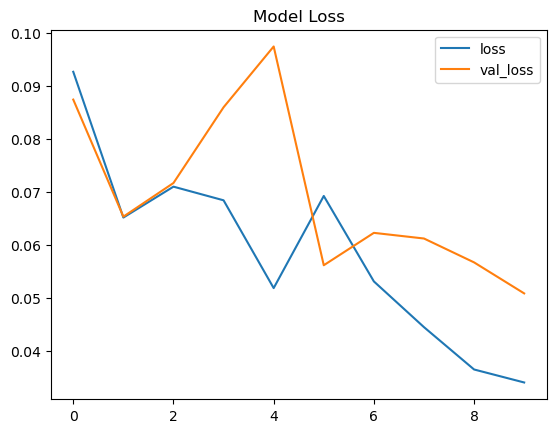

In [8]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

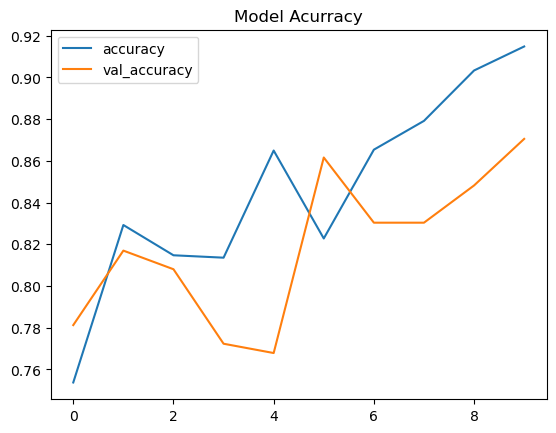

In [9]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [10]:
# printing the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9148446321487427, Val_Accuracy: 0.8705357313156128
Loss: 0.03399014100432396, Val_Loss: 0.05080048367381096


11/11 [==============================] - 3s 302ms/step


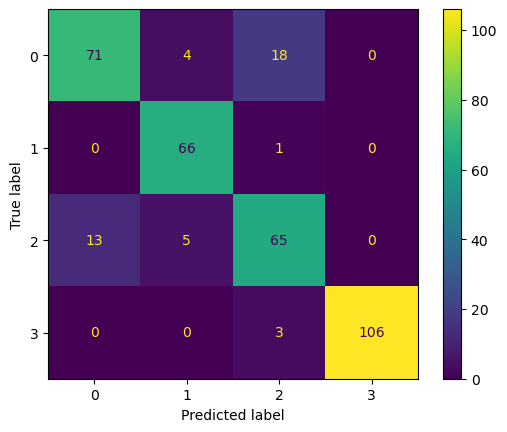

In [11]:
# collecting n batches of images and displaying the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
# a function to show a number of random images as well as predictions for it
def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 [==============================] - 0s 282ms/step


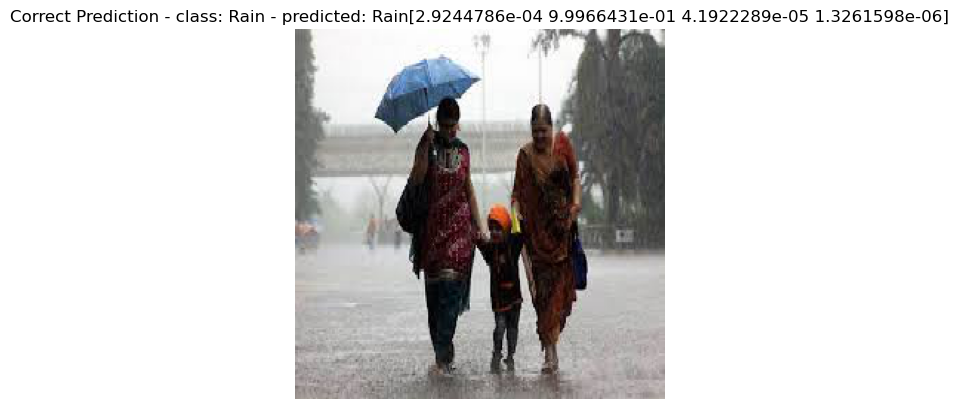

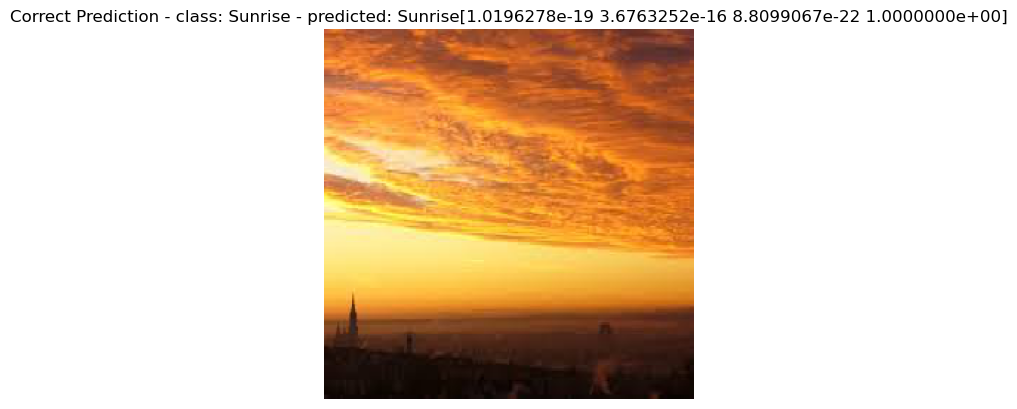

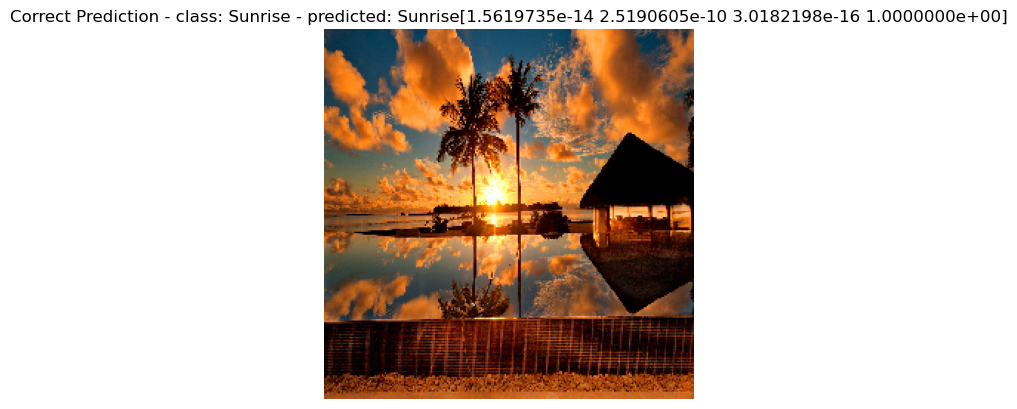

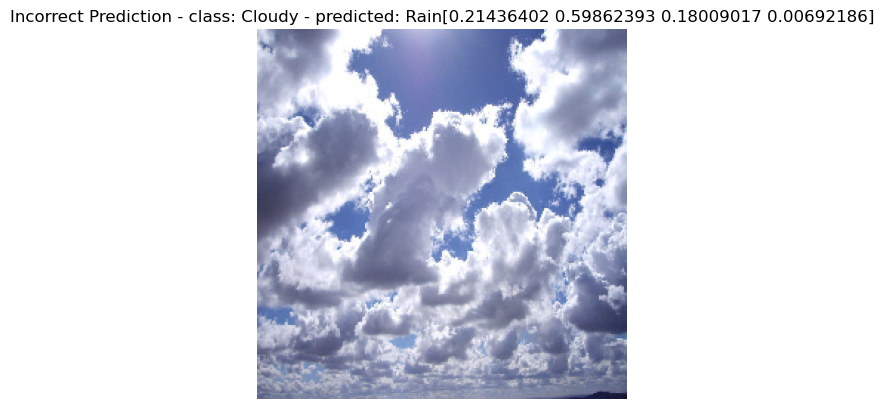

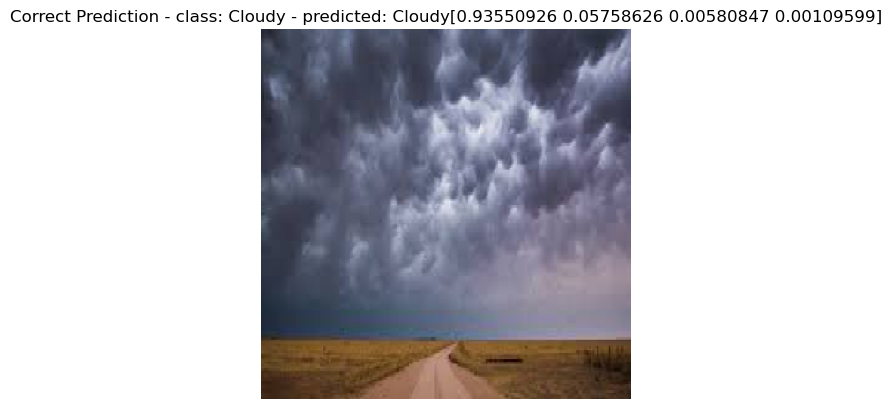

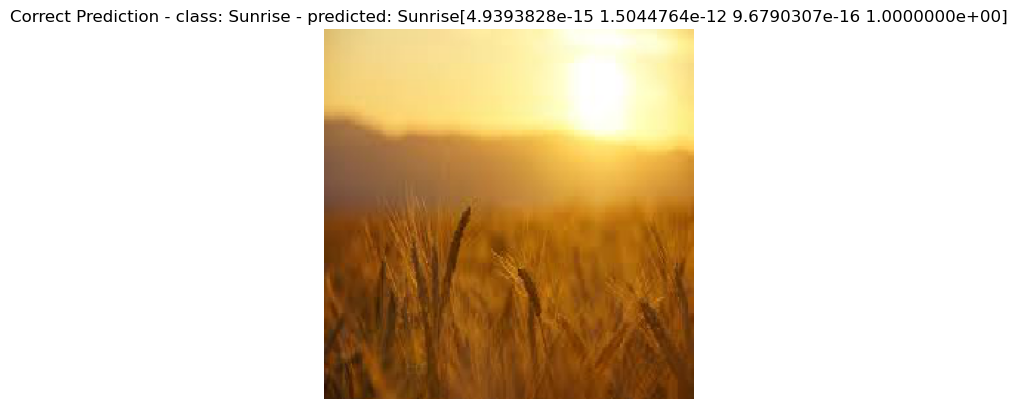

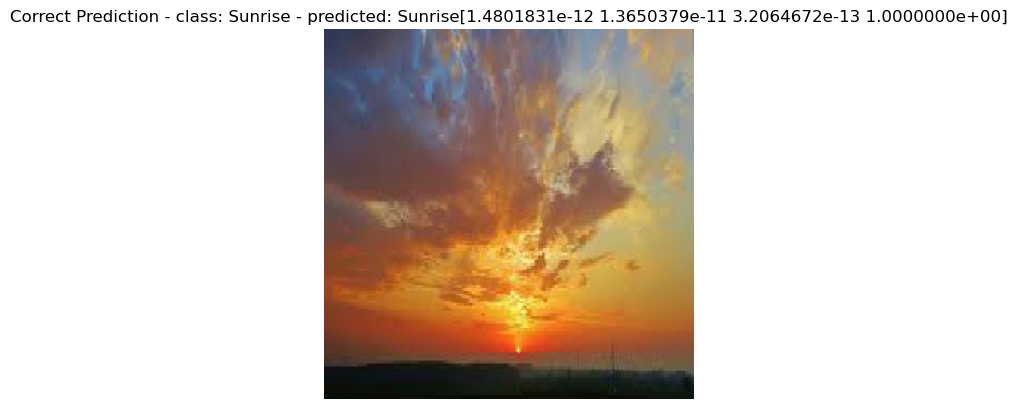

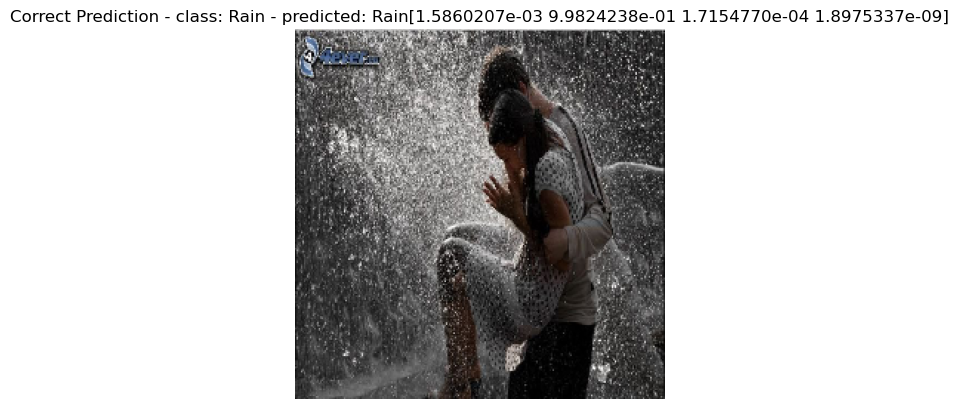

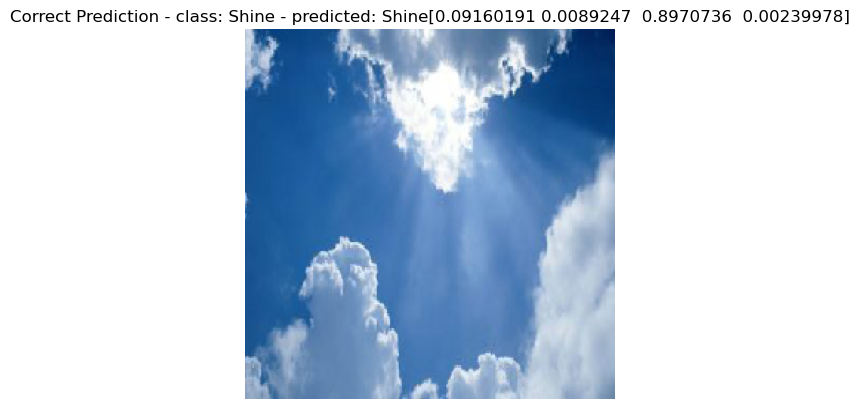

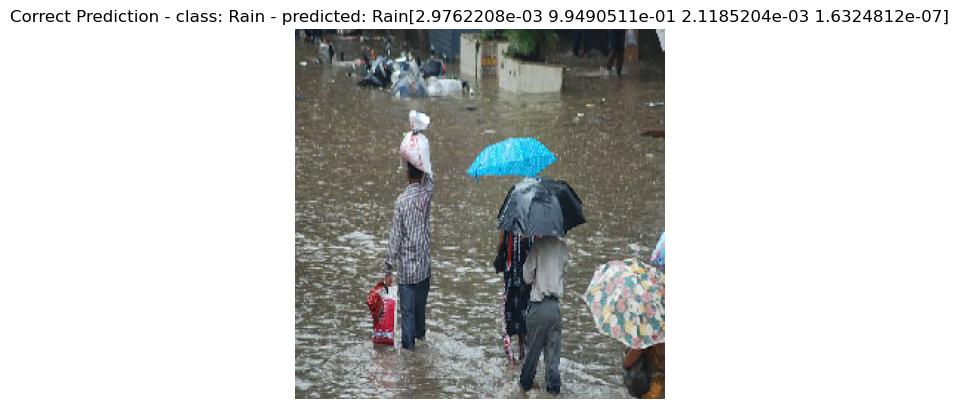

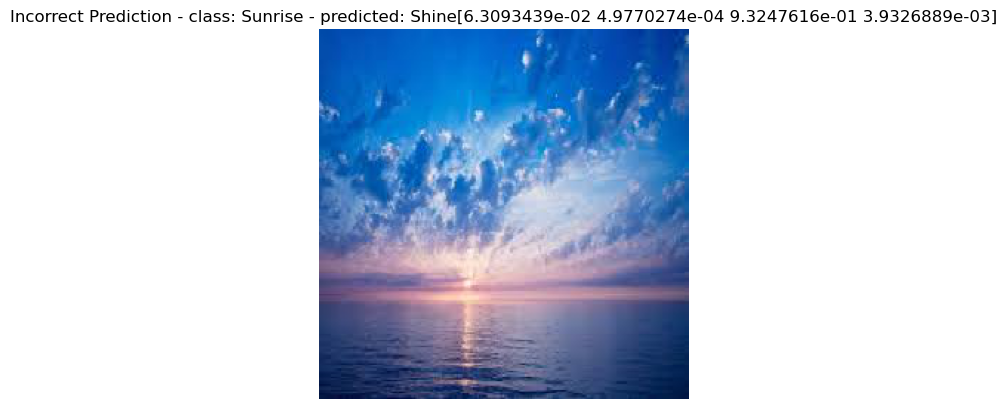

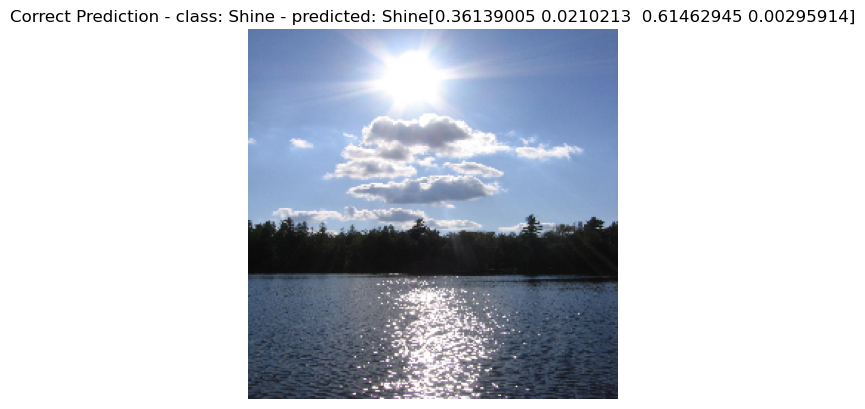

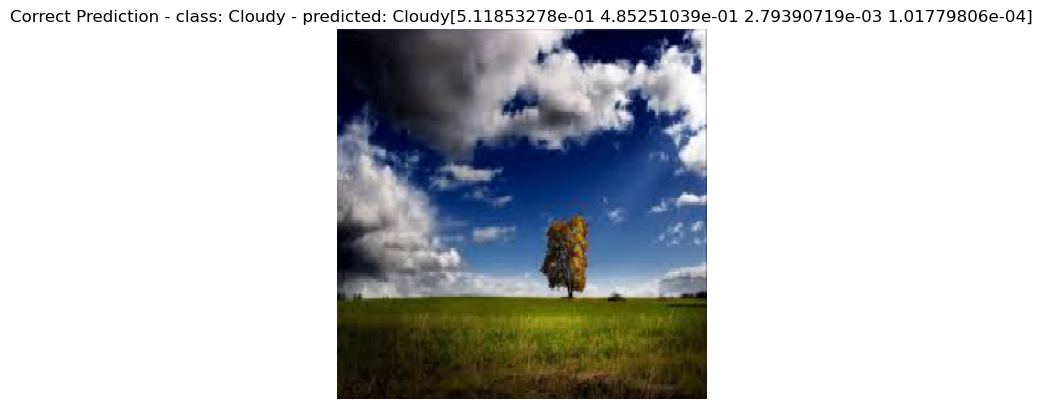

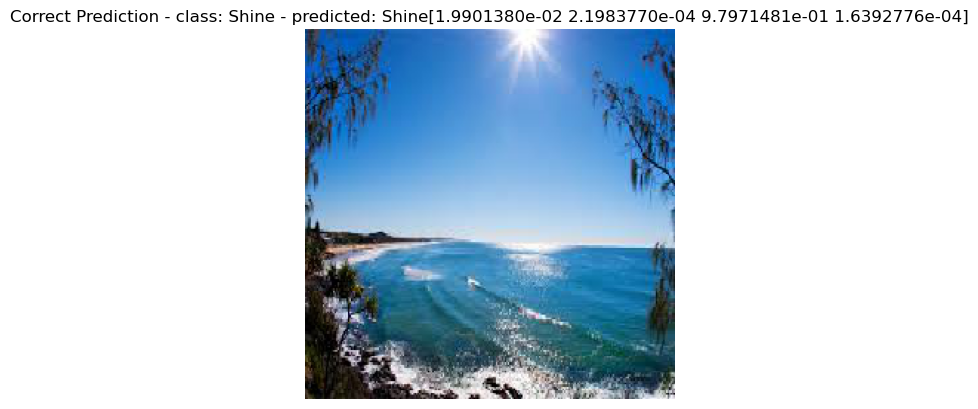

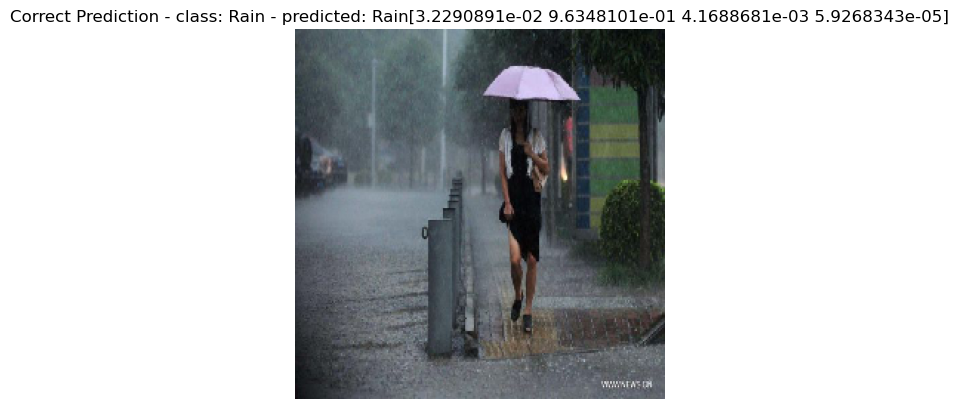

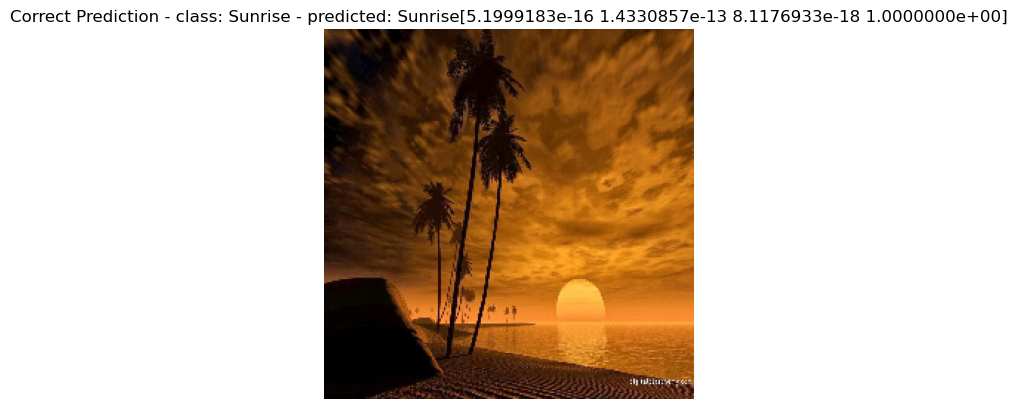

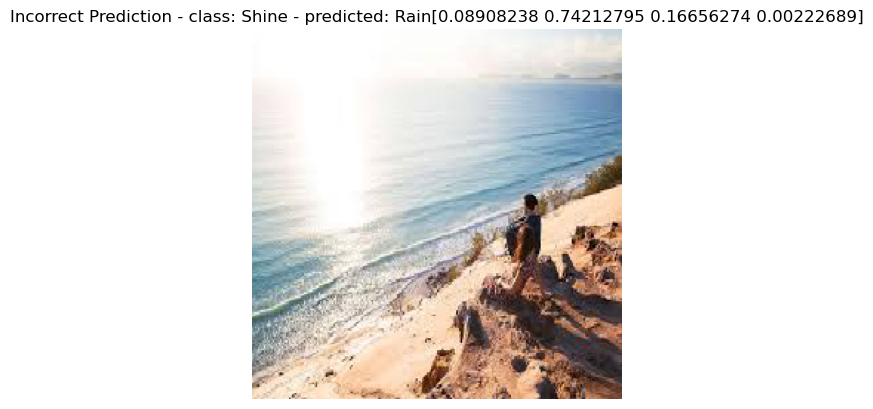

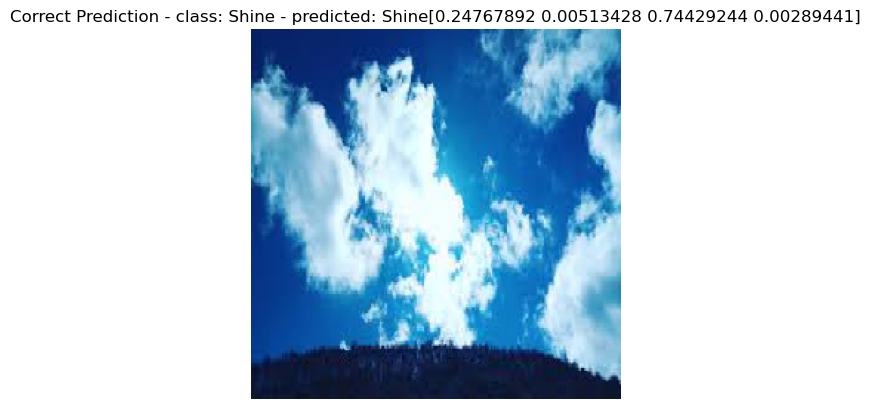

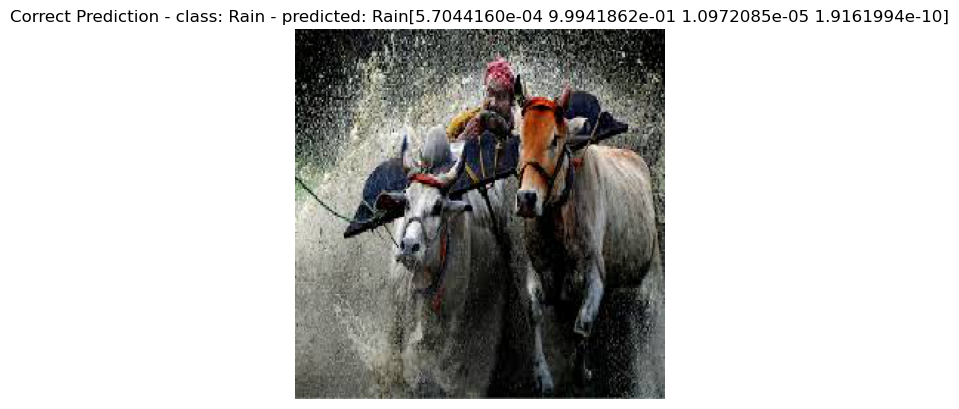

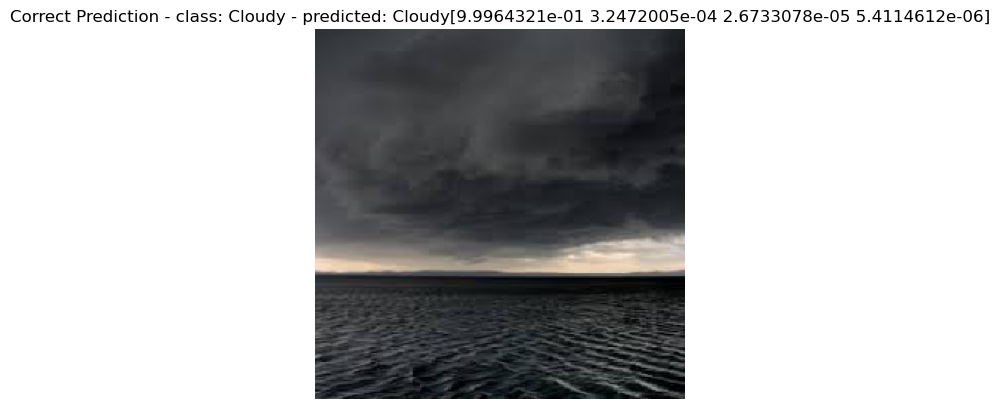

In [16]:
predict_one(model, 20) 